In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
    .config("spark.driver.memory", "8g")\
    .getOrCreate()


spark

In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyspark.sql.functions as F
import pyspark.sql.types as T

from pyspark.sql.window import Window
from pyspark.sql.functions import col, lit

from common import *

pd.set_option('display.max_rows', 100)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Server view

## By config

In [106]:
PREFIX = "main/ycsb"
CASES = {
    "baseline": events_throughput(spark, f"{PREFIX}/baseline-hot10000mp50mh100", sample=100).toPandas(),
    "ddr_ts": events_throughput(spark, f"{PREFIX}/ddr_ts-hot10000mp50mh100", sample=100).toPandas(),
}

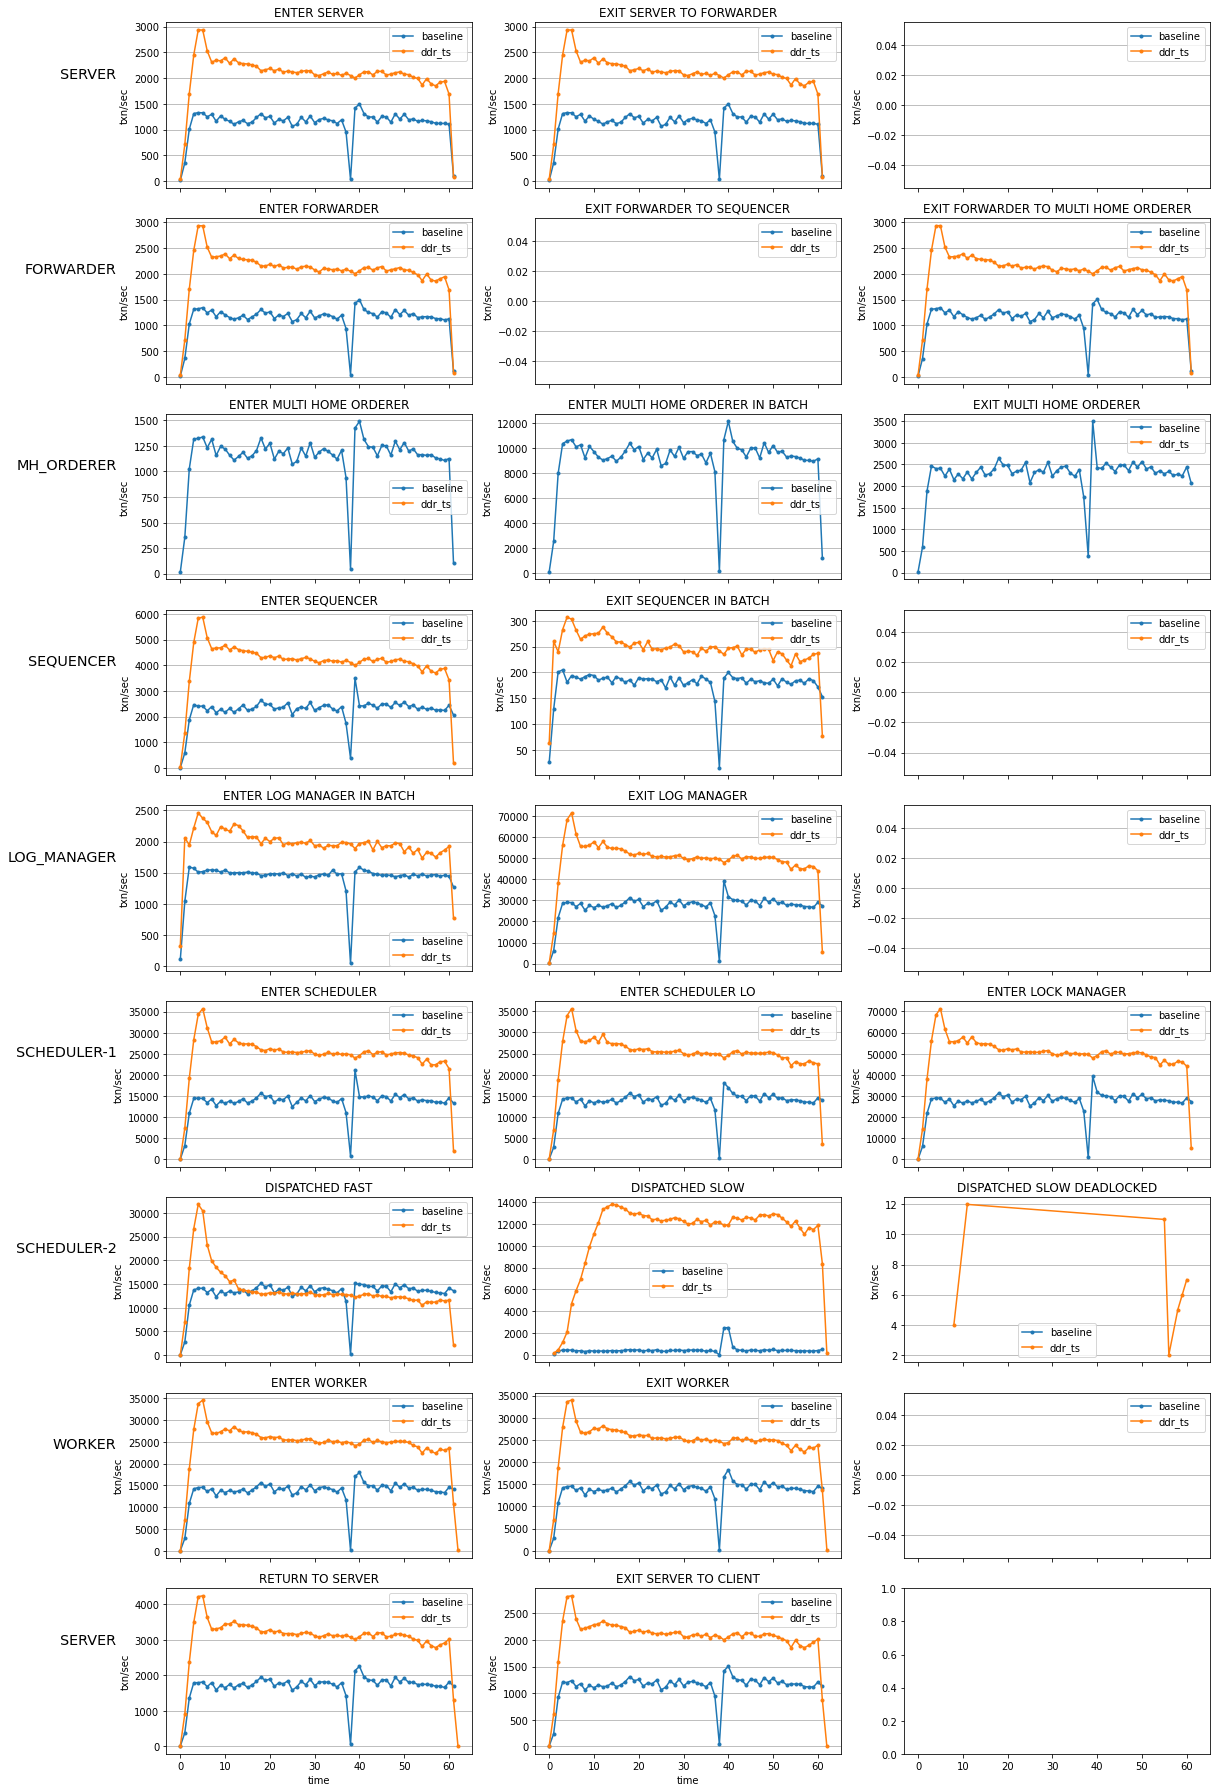

In [107]:
plot_event_throughput(CASES, sharey=False)
plt.tight_layout()

## By region

In [58]:
PREFIX = "main/ycsb"

baseline_df = events_throughput(spark, f"{PREFIX}/ddr_only-hot10000mp50mh50", sample=100, per_machine=True).toPandas()
# ddr_ts_df = events_throughput(spark, f"{PREFIX}/baseline-hot10000mp0mh100", sample=100, per_machine=True).toPandas()

regions = np.unique(np.concatenate([
    baseline_df["replica"].unique(),
#     ddr_ts_df["replica"].unique(),
]))

CASES = {}
for i in regions:
    CASES[f"baseline_{i}"] = baseline_df.loc[baseline_df.replica == i]
#     CASES[f"ddr_ts_{i}"] = ddr_ts_df.loc[ddr_ts_df.replica == i]

In [59]:
sharex = True
sharey = False

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


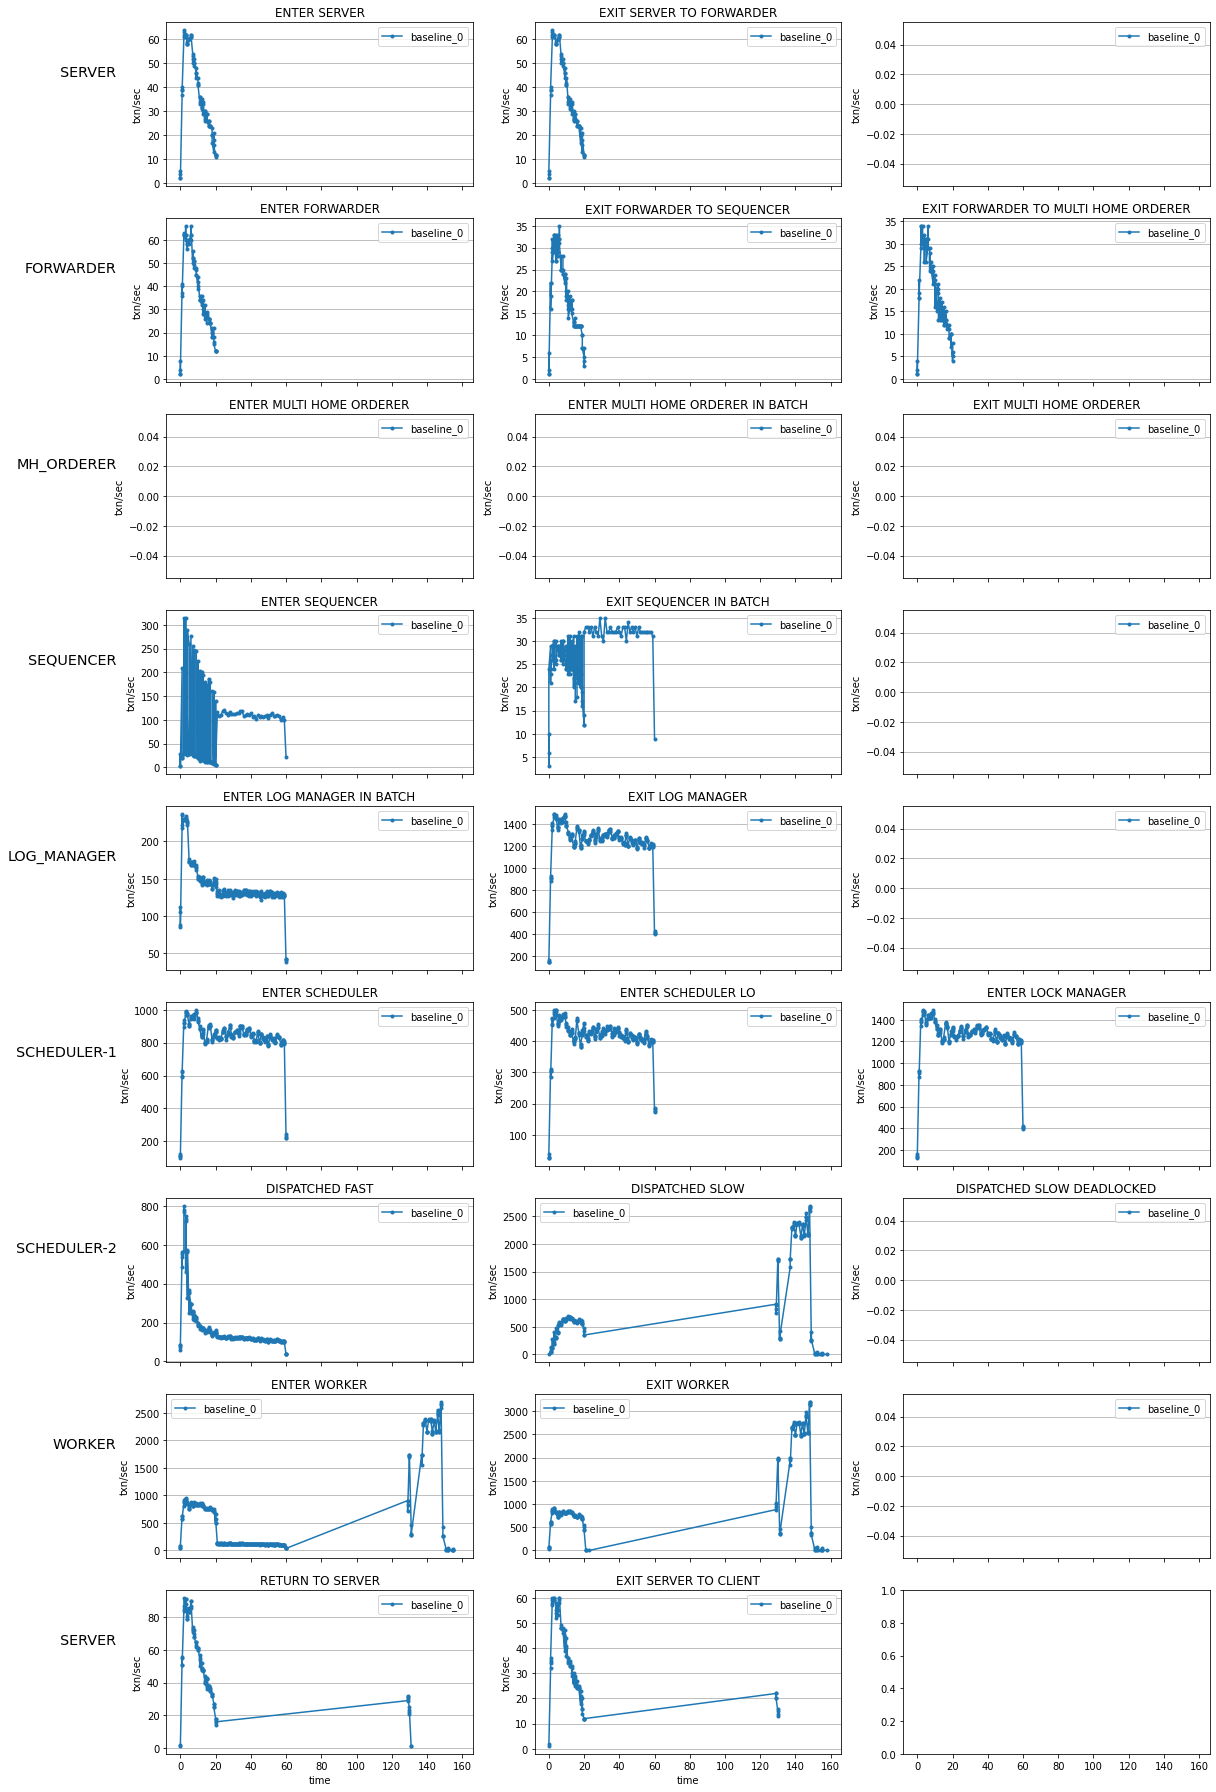

In [60]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("0")
}, sharey=sharey, sharex=sharex)
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


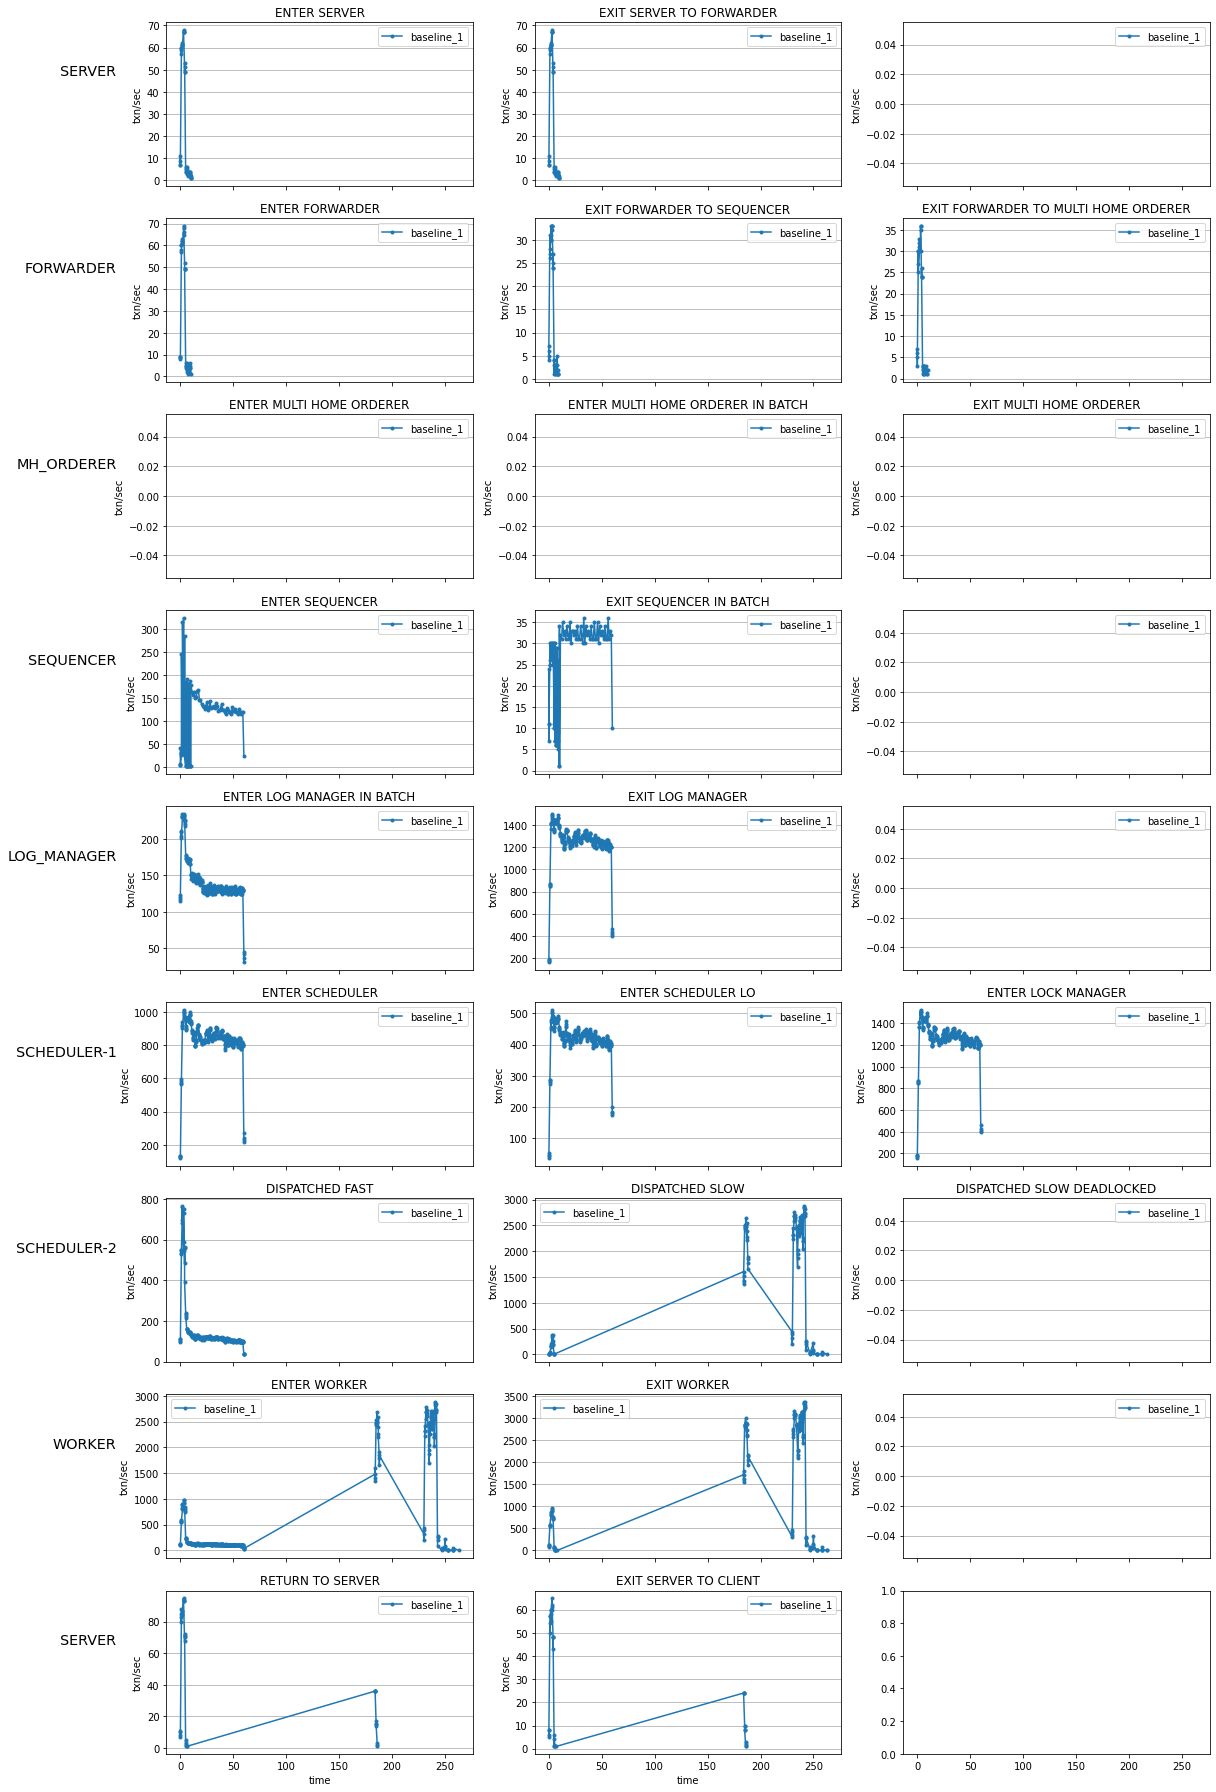

In [61]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("1")
}, sharey=sharey, sharex=sharex)
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


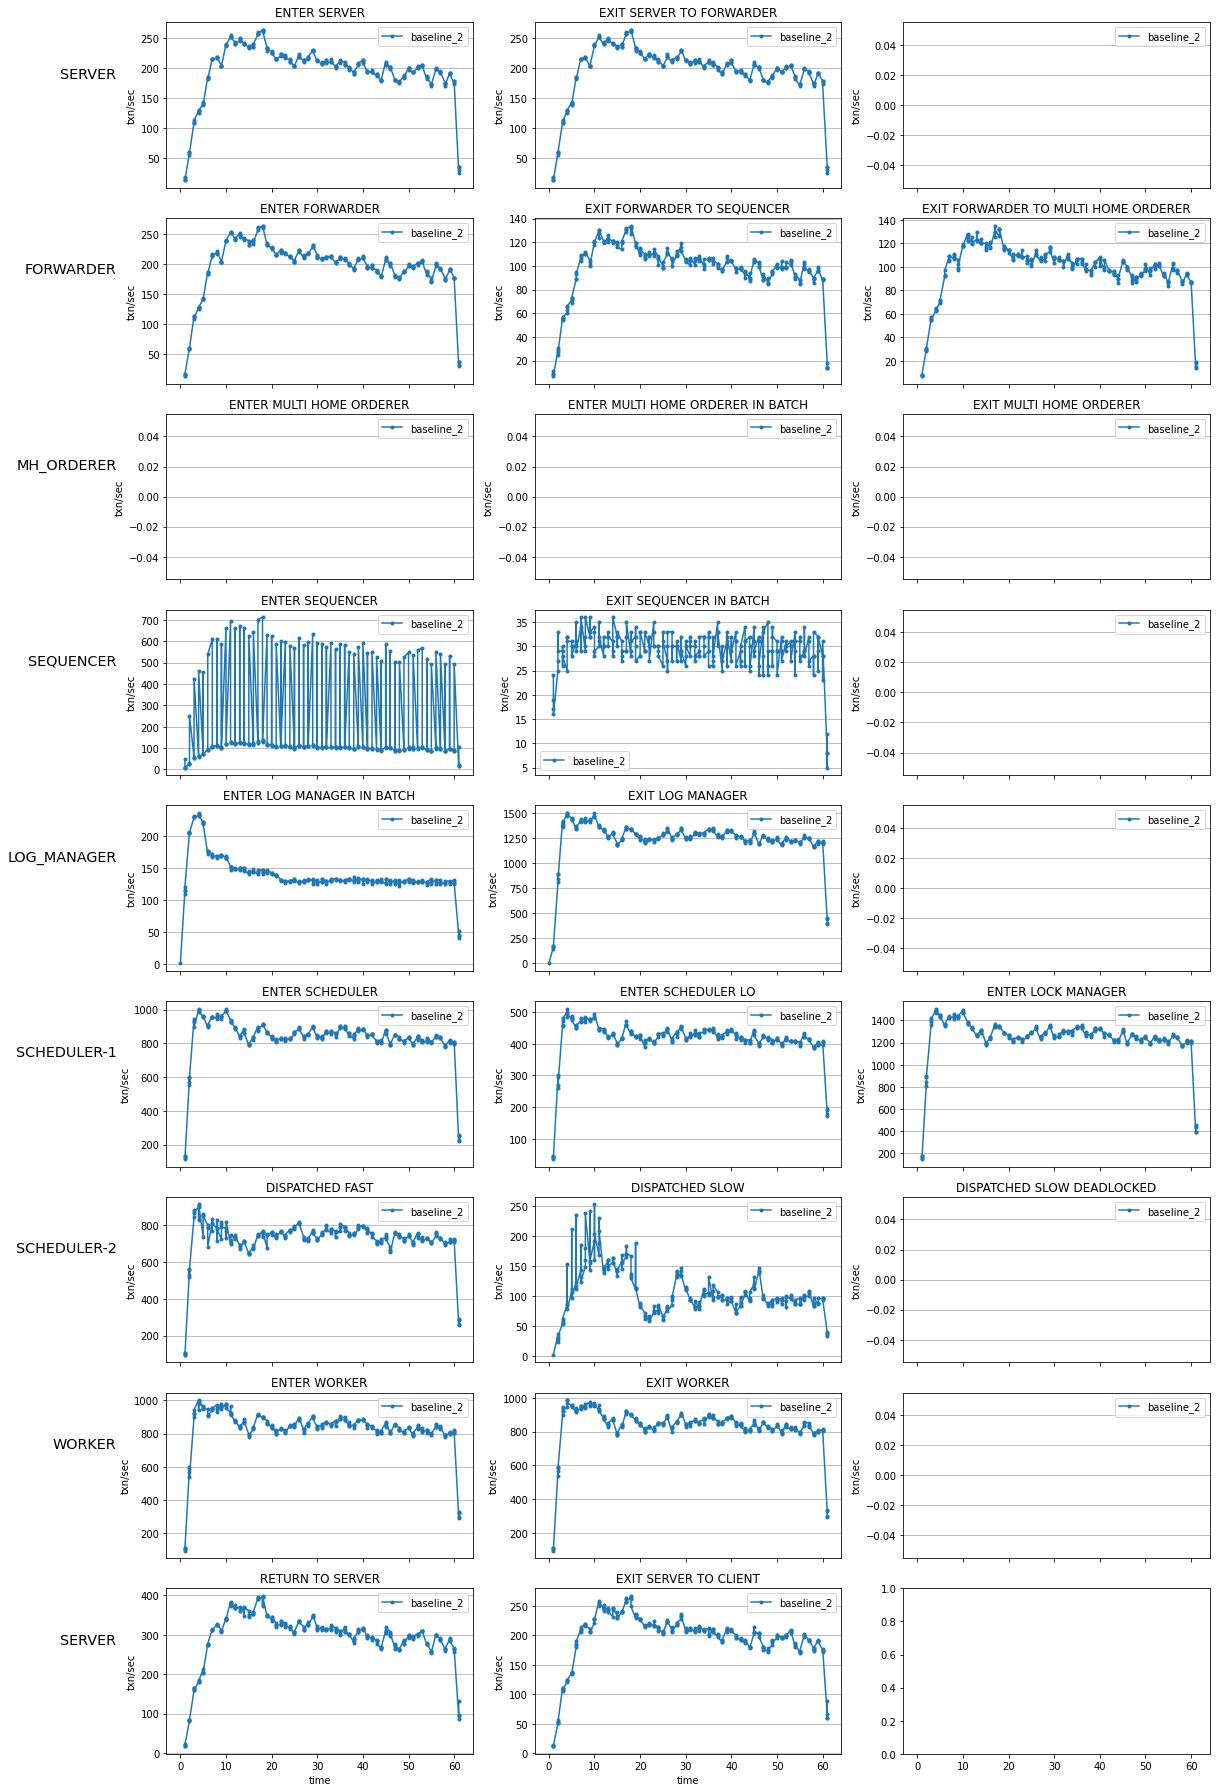

In [62]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("2")
}, sharey=sharey, sharex=sharex)
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


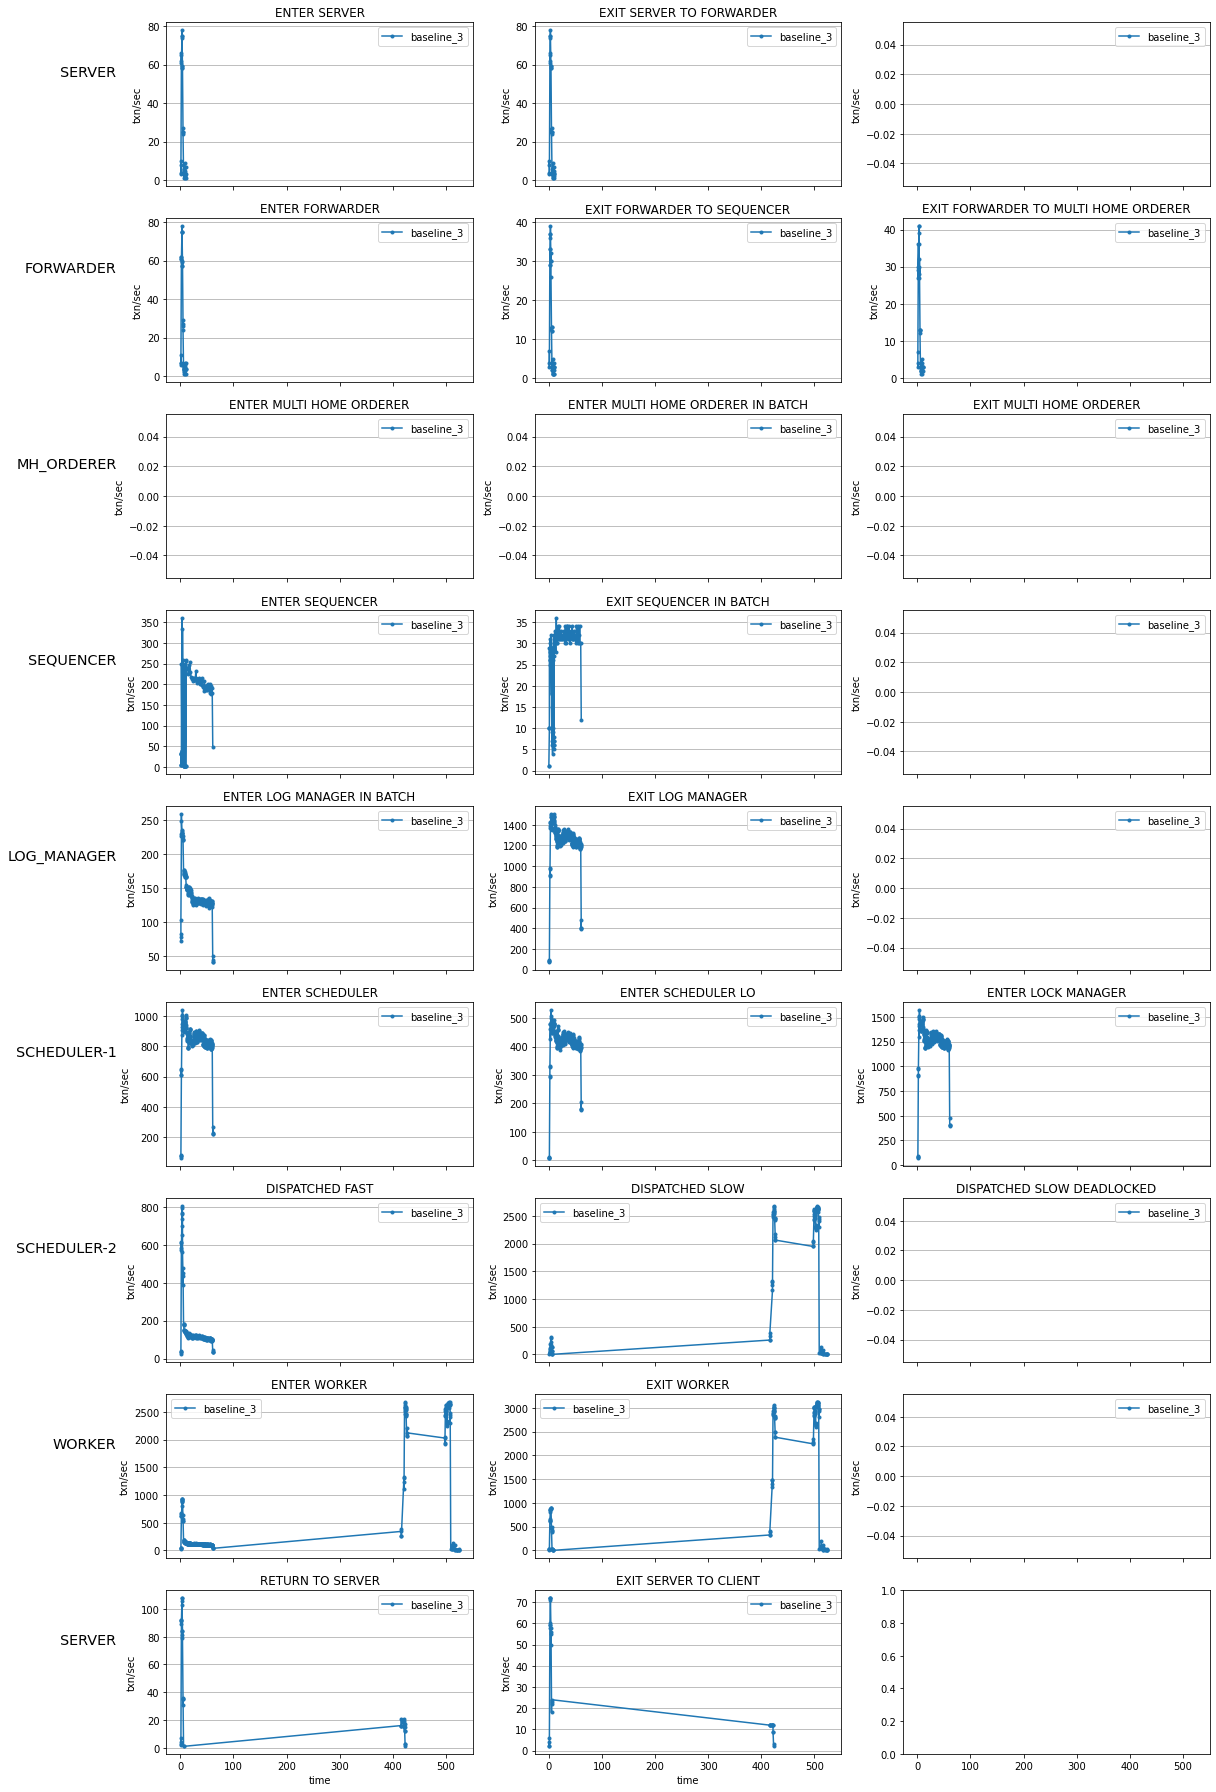

In [63]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("3")
}, sharey=sharey, sharex=sharex)
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


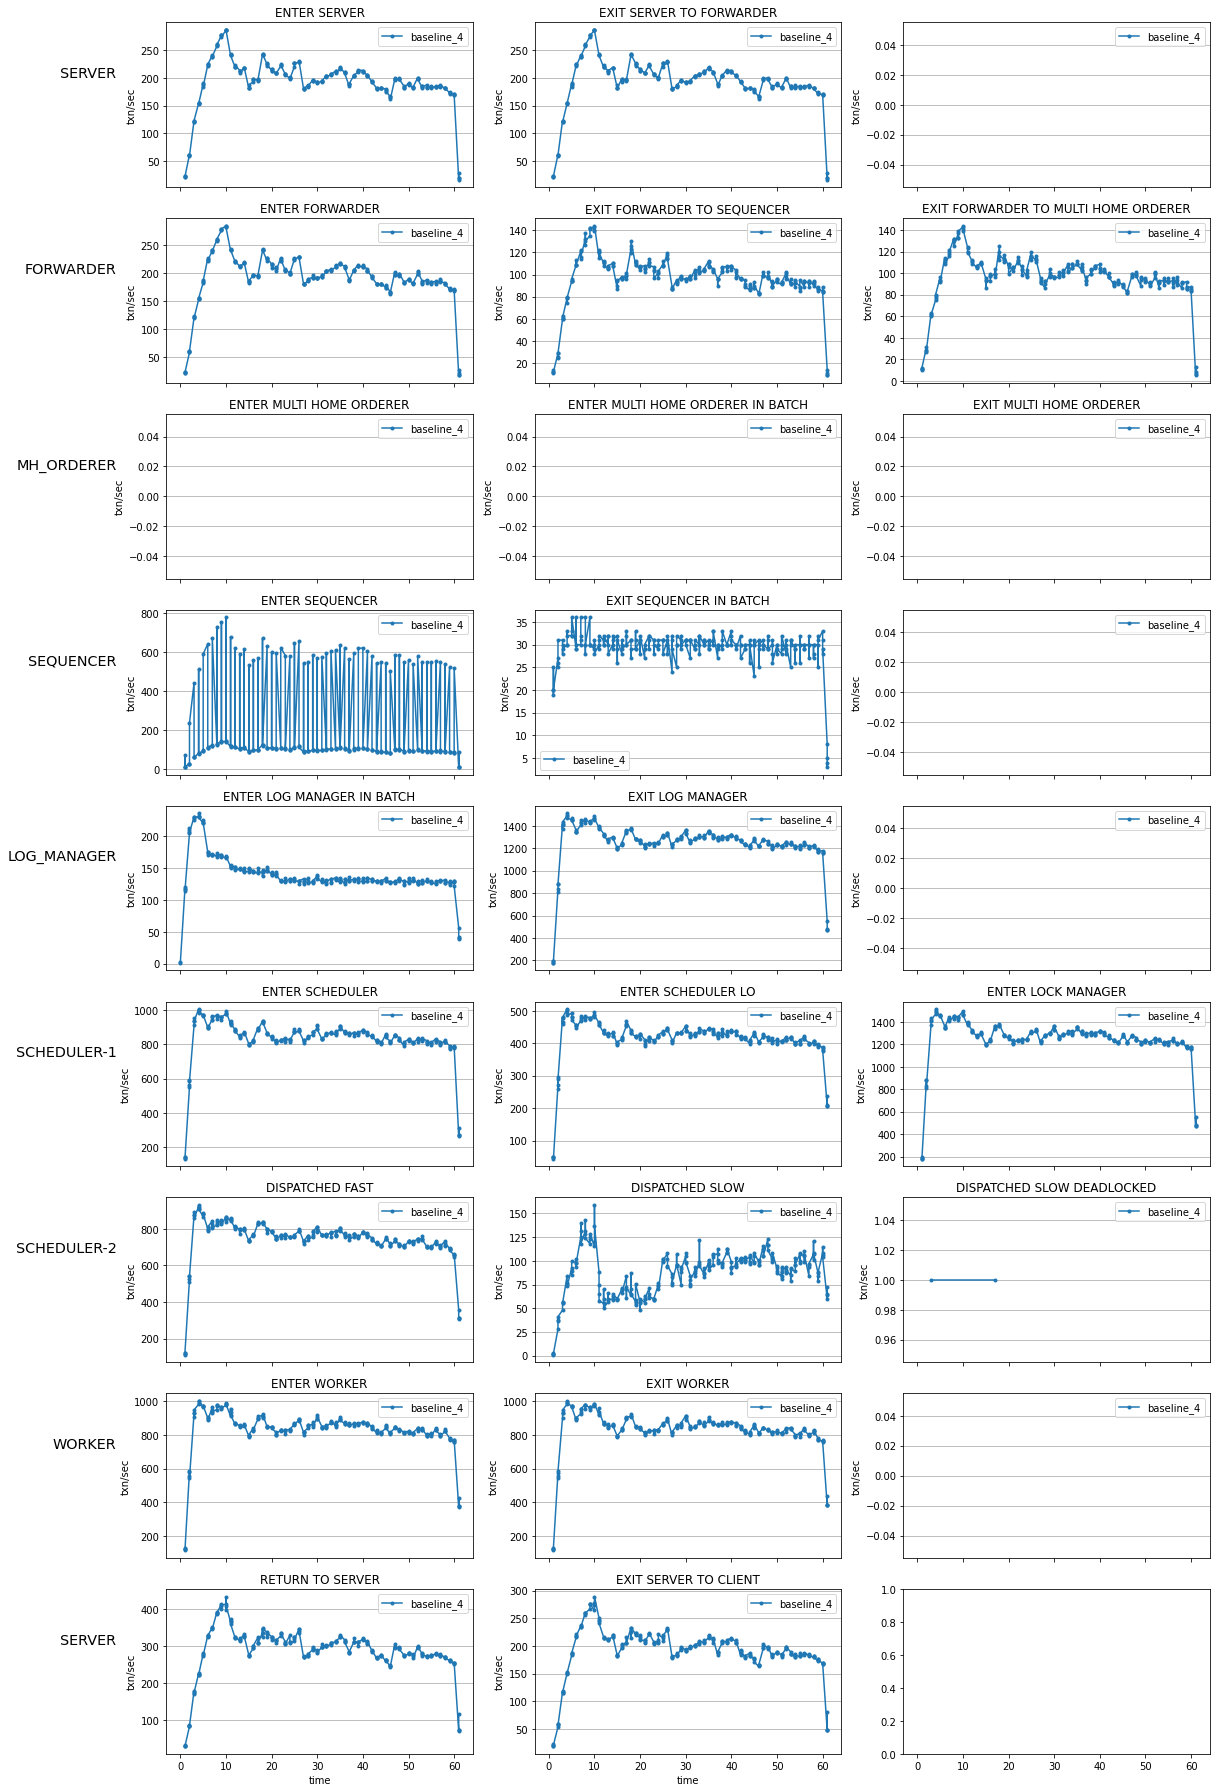

In [64]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("4")
}, sharey=sharey, sharex=sharex)
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


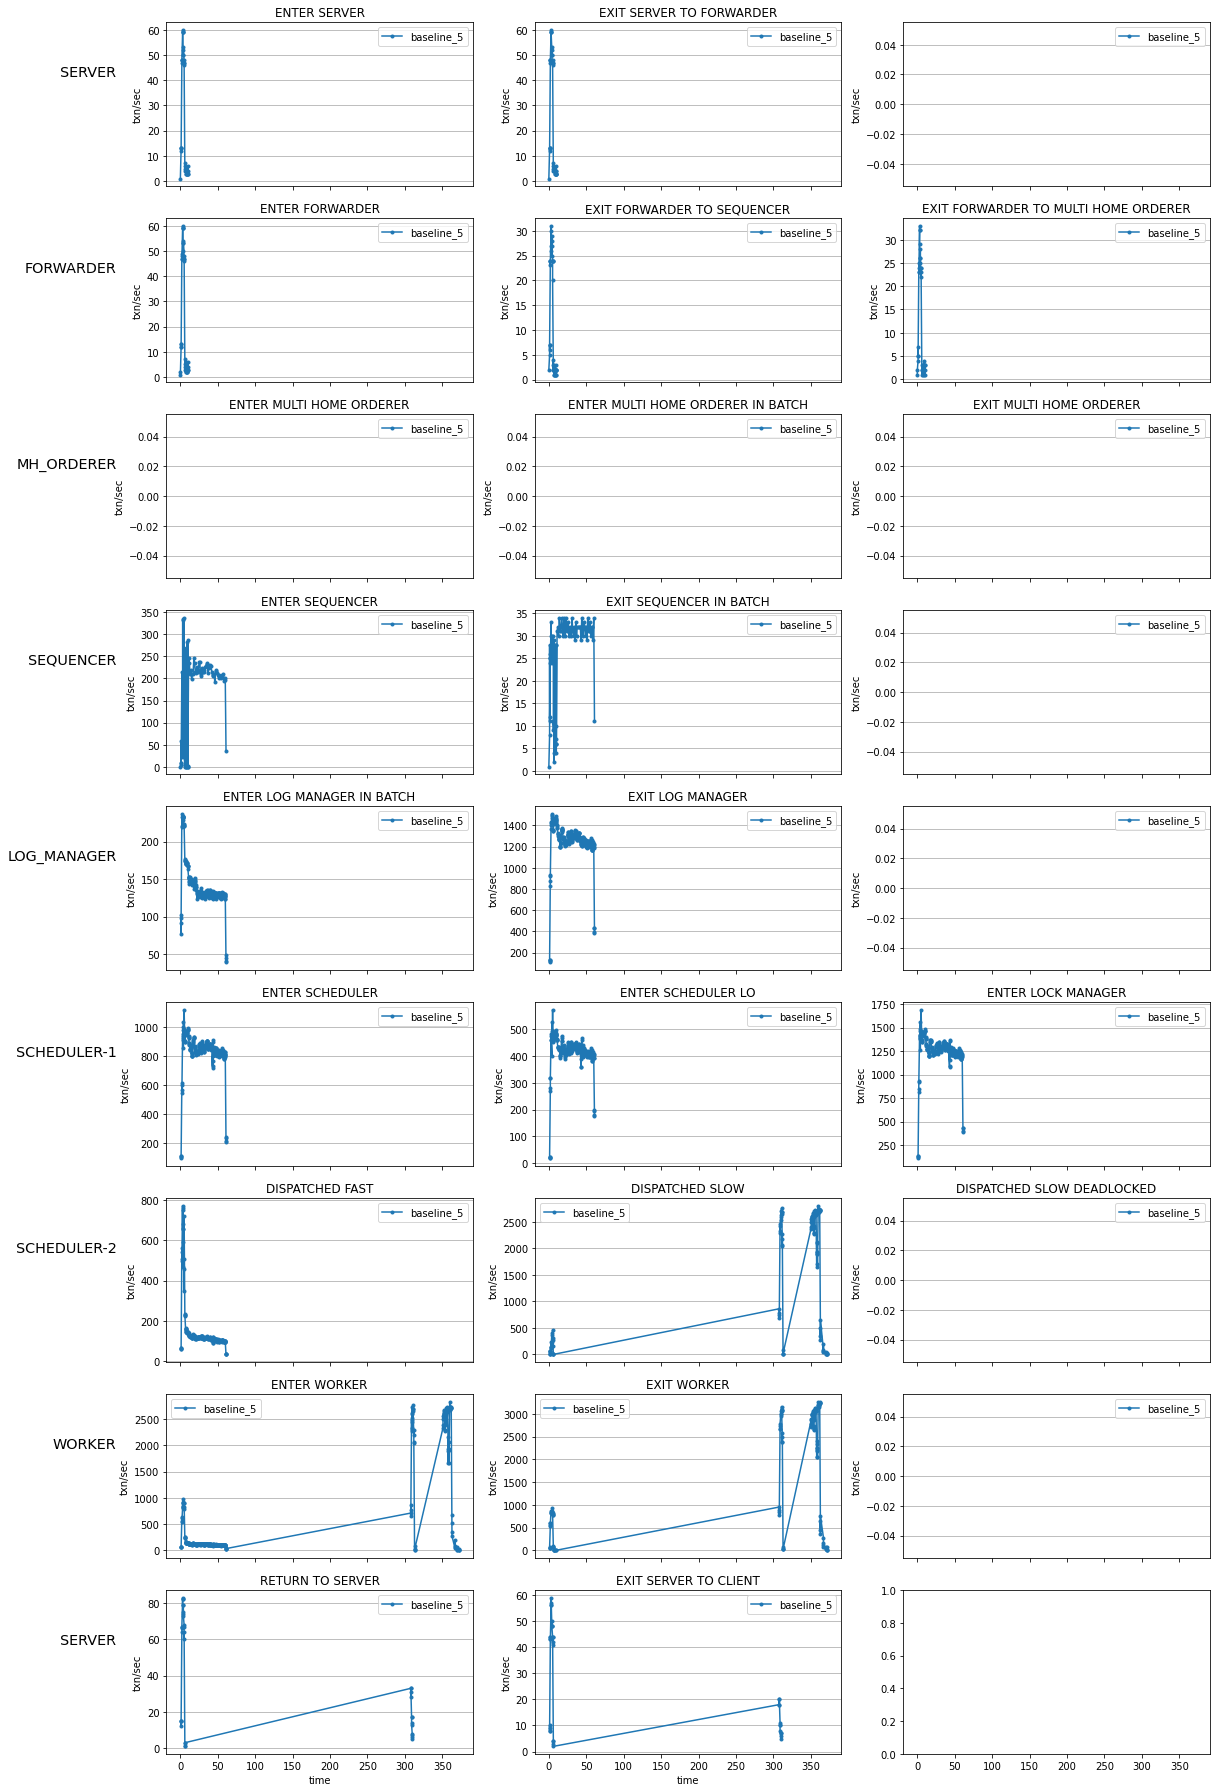

In [65]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("5")
}, sharey=sharey, sharex=sharex)
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


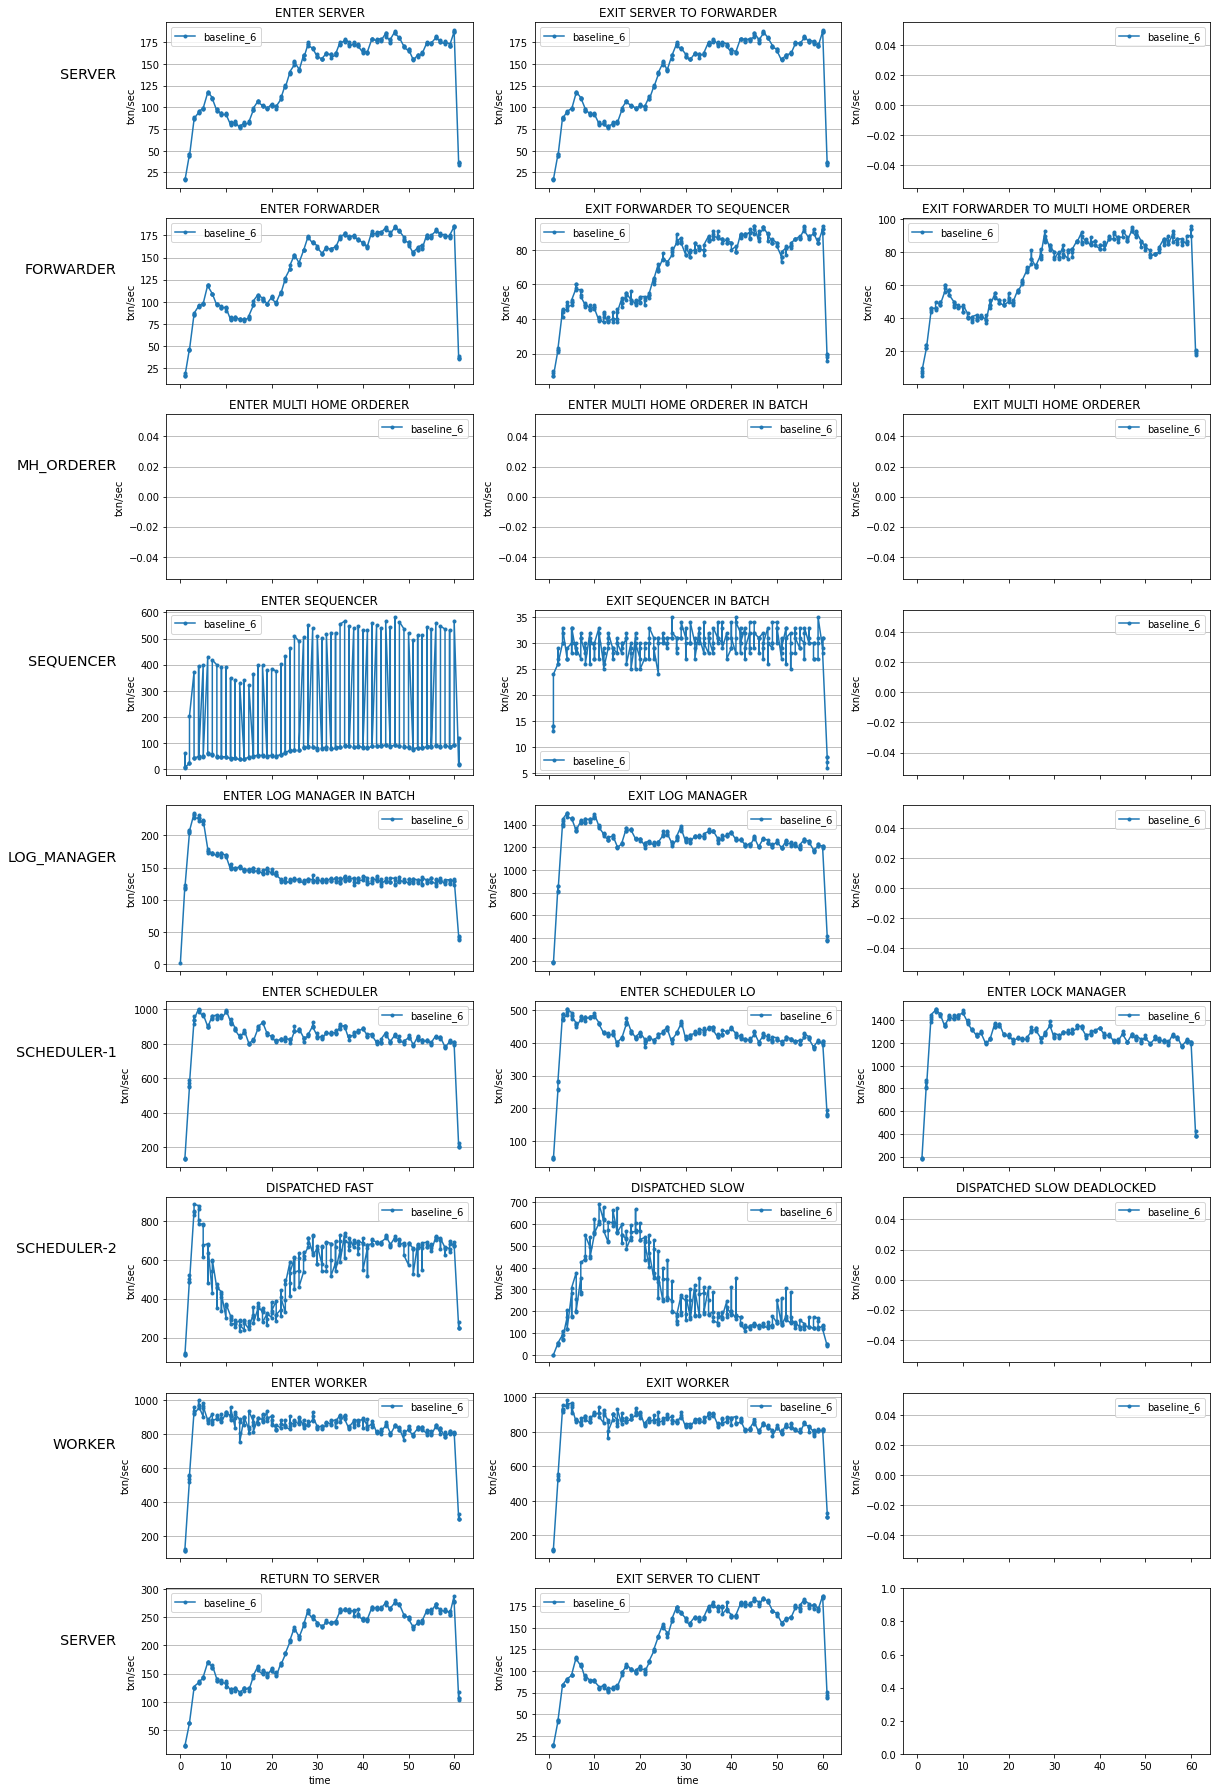

In [66]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("6")
}, sharey=sharey, sharex=sharex)
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


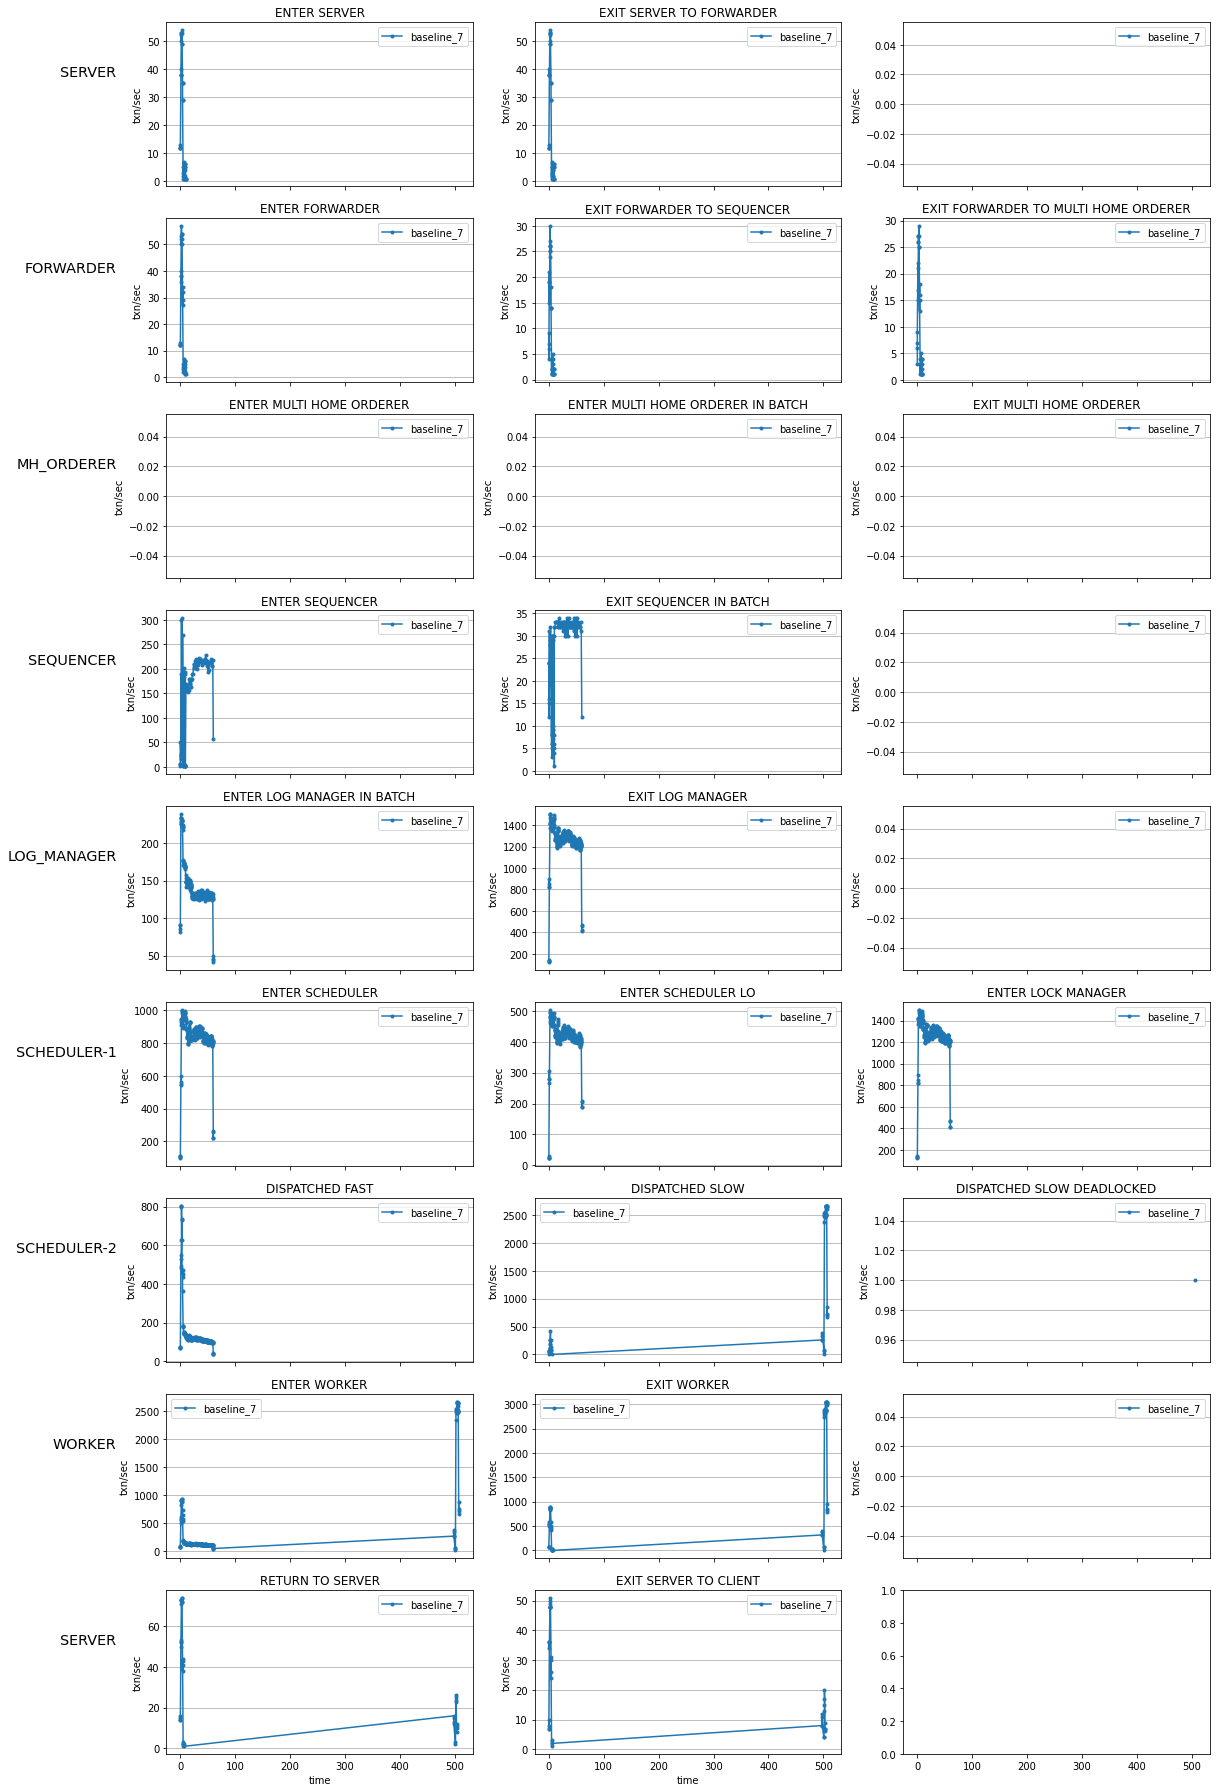

In [67]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("7")
}, sharey=sharey, sharex=sharex)
plt.tight_layout()

## By machine

In [ ]:
PREFIX = "main/tpcc"

baseline_df = events_throughput(spark, f"{PREFIX}/baseline-clients100", per_machine=True).toPandas()
ddr_ts_df = events_throughput(spark, f"{PREFIX}/ddr_ts-clients100", per_machine=True).toPandas()


CASES = {
    "ddr_ts_0_0": ddr_ts_df.loc[(ddr_ts_df.replica == 0) & (ddr_ts_df.partition == 0)],
    "ddr_ts_0_1": ddr_ts_df.loc[(ddr_ts_df.replica == 0) & (ddr_ts_df.partition == 1)],
    "ddr_ts_0_2": ddr_ts_df.loc[(ddr_ts_df.replica == 0) & (ddr_ts_df.partition == 2)],
}

In [ ]:
plot_event_throughput(CASES)
plt.tight_layout()

# Client view

In [124]:
PREFIX1 = "main/ycsb/ddr_only-hot10000mp100mh0"
PREFIX2 = "main/ycsb/ddr_only_no_ddr-hot10000mp100mh0"

def throughput_over_time(spark, prefix):
    return transactions_csv(spark, prefix, 0)\
        .withColumn("time", (col("sent_at") / 1000000000).cast(T.IntegerType()))\
        .groupBy("time")\
        .agg(
            (
                F.count("time") * (100/sample_rate(spark, prefix))
            ).alias("throughput")
        )\
        .orderBy("time")

throughput_over_time1_df = throughput_over_time(spark, PREFIX1).toPandas()
throughput_over_time1_df.loc[:, "time"] = normalize(throughput_over_time1_df["time"])

throughput_over_time2_df = throughput_over_time(spark, PREFIX2).toPandas()
throughput_over_time2_df.loc[:, "time"] = normalize(throughput_over_time2_df["time"])

<AxesSubplot:xlabel='time'>

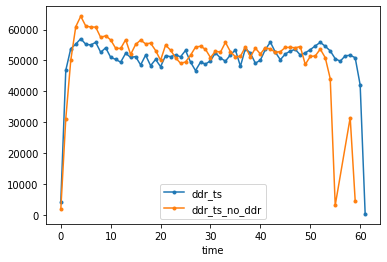

In [125]:
_, ax = plt.subplots(1, 1)
throughput_over_time1_df.plot(ax=ax, x="time", y="throughput", label="ddr_ts", marker='.')
throughput_over_time2_df.plot(ax=ax, x="time", y="throughput", label="ddr_ts_no_ddr", marker='.')